In [36]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import random as rnd
import scipy.io

%matplotlib inline

## 3.3 Preparing for PCA Projections

In [ ]:
# load the input data

YALE = scipy.io.loadmat('YALEBXF.mat')
X = YALE['X']
Y = YALE['Y']
nr, nc = 192, 168 # num rows & cols in images

In [37]:
# Num of Images For Each Label
maxL = 40 # 40 labels from 0...39
numims = np.zeros(maxL)
for jj in range(0,maxL):
    numims[jj] = (Y==jj).sum()

def packcw(A):
    return (A.T).reshape(-1,1)

def unpackcw(x,nr):
    return x.reshape(-1,nr).T

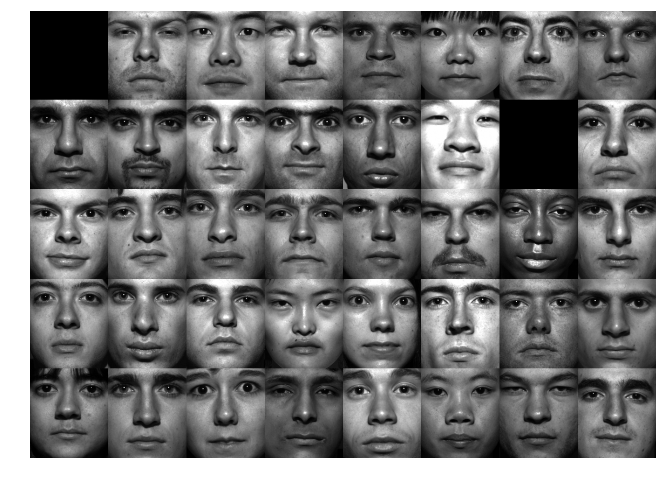

In [38]:
# Make Face Board from Data Matrix X
kk = 1
FBnr, FBnc = 5, 8
FB = np.zeros((FBnr*nr, FBnc*nc))
for jj in range(0, maxL):
    if numims[jj]>0:
        a, loc = np.where(Y == jj)
        x = X[:,loc[kk]]
        A = unpackcw(x,nr)
        row, col = divmod(jj,FBnc)
        rpt, cpt = row*nr, col*nc
        FB[rpt:rpt+nr, cpt:cpt+nc] = A
plt.figure(figsize = (15, 8))
plt.imshow(FB, cmap = 'gray')
plt.axis('off')
plt.show()

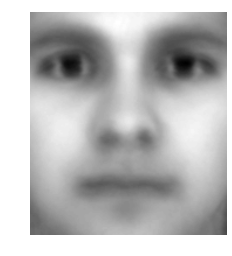

In [39]:
mu = np.sum(X, axis=1)/X.shape[1]

for i in range(X.shape[1]):
    X[:,i] -= mu

avgFaceImg = unpackcw(mu,nr)
plt.figure(1)
plt.imshow(avgFaceImg, cmap = 'gray')
plt.axis('off')
plt.show()

In [29]:
doSVD = 0

if doSVD == 1:
    U,S,V = np.linalg.svd(X, full_matrices=0, compute_uv=1)
    np.save('U.npy', U)
    np.save('S.npy', S)
    np.save('V.npy', V)
else:
    U = np.load('U.npy')
    S = np.load('S.npy')

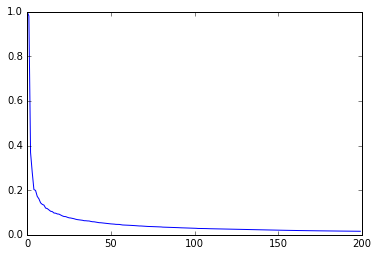

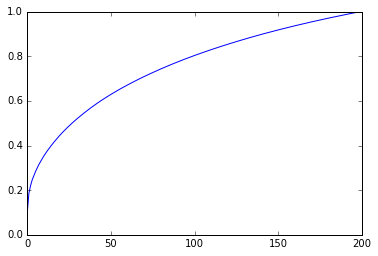

In [30]:
sigs = S[0:200] # need to square?

plt.figure()
plt.plot(sigs /  S[0])
plt.show()

plt.figure()
plt.plot(np.cumsum(sigs) / sum(S[0:200]))
plt.show()

In [25]:
mkZ = 1

if mkZ == 1:
    for d in [2,4,8,16,32,64,128,256,512]:
        Ud = U[:,0:d]
        Z = np.dot(Ud.T, X)
        name = 'Z'+str(d)
        np.save(name, Z)

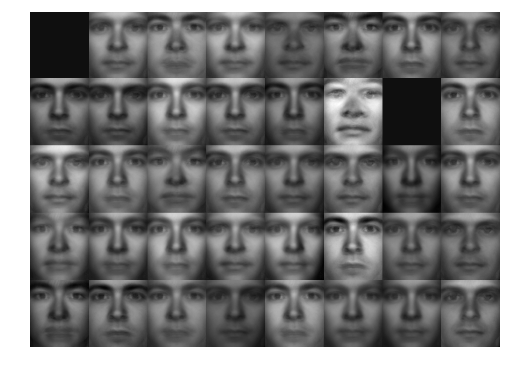

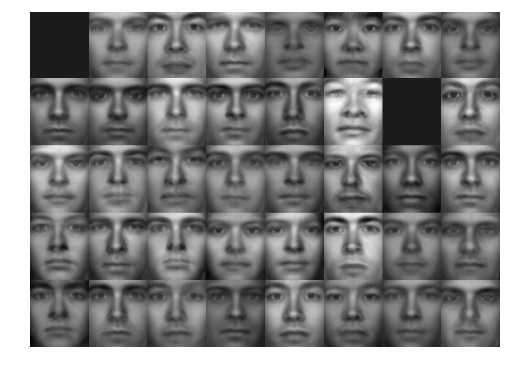

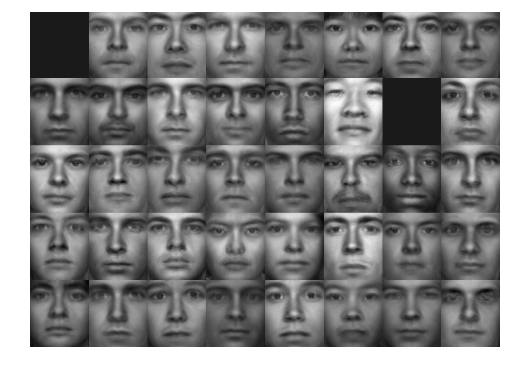

In [43]:
# Make Face Board from Approximate Images
kk = 1
FBnr, FBnc = 5, 8
for d in [8, 16, 32]:
    # load Z
    name = 'Z'+str(d)+'.npy'
    Z = np.load(name)
    Ud = U[:,0:d]

    X_approx = np.dot(Ud, Z)
    
    FB = np.zeros((FBnr*nr, FBnc*nc))
    for jj in range(0, maxL):
        if numims[jj]>0:
            a, loc = np.where(Y == jj)
            x = X_approx[:,loc[kk]]
            A = unpackcw(x,nr)
            row, col = divmod(jj,FBnc)
            rpt, cpt = row*nr, col*nc
            FB[rpt:rpt+nr, cpt:cpt+nc] = A
    plt.figure(figsize = (16, 6))
    plt.imshow(FB, cmap = 'gray')
    plt.axis('off')
    plt.show()
    

## 4.1 First Set of Experiments